# Deciphering Road Accidents: A Deep Dive into Hidden Patterns and Risk Factors


## Business Understanding


### Problem statement
Our primary objective is to uncover hidden patterns and risk factors contributing to road accidents beyond commonly recognized factors like speeding and impaired driving. By identifying these additional risk elements, we aim to enhance road safety strategies, improve accident prevention measures, and reduce the severity of road accidents.
### Why this Topic
Road accidents are a major concern worldwide, causing injuries and deaths that have a profound impact on families and communities. In Kenya, road accidents remain a significant public health issue, with thousands of people losing their lives each year due to road-related incidents. Our dataset is Not specific to Kenya.  According to the World Health Organization (WHO), road traffic injuries are among the top 10 leading causes of death worldwiede, highlighting the urgent need for effective prevention strategies. By studying the reasons behind these accidents and identifying hidden patterns and risk factors, we can develop targeted interventions to improve road safety and reduce the number of accidents, injuries, and fatalities on roads worldwide.

### Domain
This project applies to the transportation and public safety domain, with potential implications for government agencies, transportation companies, and advocacy groups.
### Target Audience
Government policymakers, transportation experts, safety agencies, and the general public will benefit from insights and recommendations generated by this analysis.
### Real-World Impact
Implementation of findings could lead to a reduction in road accidents, injuries, fatalities, and associated economic costs on a global scale.
### Pre-existing Projects
Our project aims to uncover additional hidden factors and patterns using advanced data analysis techniques, complementing existing research on road accident causes and prevention strategies.

## Objectives

1. To identify Key Predictive Factors: Investigate the influence of various roadway and environmental factors (e.g., road surface, lighting conditions, weather) on crash occurrence and severity to identify key predictive attributes.
2. To assess Driver Behavior Impact: Analyze the correlation between driver behavior attributes (e.g., speed, alcohol/drug involvement) and crash severity to understand the role of driver actions in accidents.
3. To develop Early Warning Systems: Create predictive models to anticipate high-risk areas and times for accidents, enabling proactive measures such as enhanced law enforcement or targeted road safety campaigns.
4. To evaluate Infrastructure Vulnerability: Assess the impact of road infrastructure features (e.g., intersections, road markings) on crash frequency and severity to prioritize infrastructure improvements for accident prevention.
5. To optimize Resource Allocation: Utilize predictive analytics to optimize resource allocation for emergency response and medical services by forecasting the likelihood and severity of future accidents in specific regions or road segments.

### Data Understanding
* Data Collection:  Comprehensive road accident data will be collected from international sources, including government databases, police reports, healthcare records, and insurance databases.
* Source of Data: The dataset utilized for this analysis was obtained from the official New Zealand Government data website. It encompasses comprehensive information regarding road accidents spanning from the year 2000 through April 2024.

# Exploratory Data Analysis

### Understanding the data

In [1]:
# pip install matplotlib seaborn


In [2]:
# Importing the necessary libraries
import pandas as pd
from collections import Counter #simplifies counting occurrences of elements in a Python iterable by providing a dictionary-like object.
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_17028\1744073369.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Loading the dataset
df = pd.read_csv("data.csv")


In [4]:
#Checking out the first 10 rows
df.head(10)

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,178.031840,-38.669793,1,NaN,544801.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,175.264695,-37.785862,2,NaN,528900.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,174.751715,-36.708328,3,NaN,507000.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,172.394398,-43.609495,4,NaN,597513.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
4,168.385299,-46.417826,5,NaN,611500.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
5,169.739754,-46.262517,6,30.0,607300.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
6,174.982435,-41.159414,7,NaN,568101.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
7,174.937477,-37.062911,8,NaN,525420.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,1.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
8,175.235256,-37.751316,9,NaN,528403.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Open,0.0,NaN,NaN,Fine,Null
9,174.874776,-36.964072,10,NaN,523601.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,1.0,0.0,Fine,Null


In [5]:
#Checking the data shape
df.shape

(821744, 72)

In [6]:
# Checking out the data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          821744 non-null  float64
 1   Y                          821744 non-null  float64
 2   OBJECTID                   821744 non-null  int64  
 3   advisorySpeed              31344 non-null   float64
 4   areaUnitID                 821647 non-null  float64
 5   bicycle                    821739 non-null  float64
 6   bridge                     332913 non-null  float64
 7   bus                        821739 non-null  float64
 8   carStationWagon            821739 non-null  float64
 9   cliffBank                  332913 non-null  float64
 10  crashDirectionDescription  821744 non-null  object 
 11  crashFinancialYear         821744 non-null  object 
 12  crashLocation1             821744 non-null  object 
 13  crashLocation2             82

**Observations**
* Some columns have no data at all
* Some rows have missing data
* Some rows have the wrong data type

In [7]:
#Summary statistics
df.describe()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,tlaId,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,vanOrUtility,vehicle,waterRiver
count,821744.000000,821744.000000,8.217440e+05,31344.000000,821647.000000,821739.000000,332913.000000,821739.000000,821739.000000,332913.000000,...,818556.000000,332913.000000,332913.000000,332913.000000,332913.000000,821739.000000,821739.000000,821739.000000,332913.000000,332913.000000
mean,174.268497,-39.324055,6.541132e+05,54.437851,546241.601791,0.028963,0.013724,0.015870,1.311054,0.106319,...,52.409900,0.028815,0.048709,0.001511,0.101555,0.080399,0.003057,0.175788,0.025046,0.009967
std,5.565359,2.970823,3.797024e+05,18.175564,32537.949166,0.171136,0.117603,0.126396,0.784490,0.309588,...,24.000807,0.168825,0.216970,0.038841,0.305681,0.283694,0.056963,0.410052,0.158098,0.099696
min,-176.760762,-46.904849,1.000000e+00,15.000000,500100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.198951,-41.231382,3.296288e+05,40.000000,519400.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,174.784685,-37.889268,6.553465e+05,55.000000,536642.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.229901,-36.908110,9.881782e+05,65.000000,573523.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.544357,-34.430214,1.318963e+06,95.000000,626801.000000,5.000000,4.000000,3.000000,11.000000,3.000000,...,76.000000,4.000000,4.000000,1.000000,3.000000,5.000000,3.000000,6.000000,4.000000,2.000000


### Data cleaning

In [8]:
df.duplicated().sum()

0

In [9]:
# Checking the percentage of missing values in every column
missing_percent = df.isnull().mean() * 100

# Print percentage of missing values in each column, using for loop so as to view all the columns
print("Percentage of missing values in each column:")
for column, percentage in missing_percent.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of missing values in each column:
X: 0.00%
Y: 0.00%
OBJECTID: 0.00%
advisorySpeed: 96.19%
areaUnitID: 0.01%
bicycle: 0.00%
bridge: 59.49%
bus: 0.00%
carStationWagon: 0.00%
cliffBank: 59.49%
crashDirectionDescription: 0.00%
crashFinancialYear: 0.00%
crashLocation1: 0.00%
crashLocation2: 0.16%
crashRoadSideRoad: 100.00%
crashSeverity: 0.00%
crashSHDescription: 0.00%
crashYear: 0.00%
debris: 59.49%
directionRoleDescription: 0.01%
ditch: 59.49%
fatalCount: 0.00%
fence: 59.49%
flatHill: 0.00%
guardRail: 59.49%
holiday: 94.55%
houseOrBuilding: 59.49%
intersection: 100.00%
kerb: 59.49%
light: 0.00%
meshblockId: 0.01%
minorInjuryCount: 0.00%
moped: 0.00%
motorcycle: 0.00%
NumberOfLanes: 0.22%
objectThrownOrDropped: 59.49%
otherObject: 59.49%
otherVehicleType: 0.00%
overBank: 59.49%
parkedVehicle: 59.49%
pedestrian: 96.76%
phoneBoxEtc: 59.49%
postOrPole: 59.49%
region: 0.39%
roadCharacter: 0.00%
roadLane: 0.00%
roadSurface: 0.00%
roadworks: 59.49%
schoolBus: 0.00%
seriousInjuryCount:

In [10]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Identify columns where more than 80% of the data is missing
columns_more_than_80_percent_missing = missing_percent[missing_percent >= 80].index.tolist()

print(columns_more_than_80_percent_missing)


['advisorySpeed', 'crashRoadSideRoad', 'holiday', 'intersection', 'pedestrian', 'temporarySpeedLimit']


In [11]:
# Drop columns with above 80% missing data
df = df.drop(columns=['advisorySpeed', 'crashRoadSideRoad', 'holiday', 'intersection', 'pedestrian', 'temporarySpeedLimit'])

All columns missing 80% or more of the rows have been dropped.

In [12]:
# Checking the shape of the data after dropping columns
df.shape

(821744, 66)

In [13]:
# Checking the first 5 columns of the new dataset
df.head()

,X,Y,OBJECTID,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,178.031840,-38.669793,1,544801.0,0.0,NaN,0.0,2.0,NaN,Null,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,175.264695,-37.785862,2,528900.0,0.0,NaN,0.0,2.0,NaN,Null,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,174.751715,-36.708328,3,507000.0,0.0,NaN,0.0,0.0,NaN,Null,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,172.394398,-43.609495,4,597513.0,0.0,0.0,0.0,2.0,0.0,Null,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
4,168.385299,-46.417826,5,611500.0,0.0,NaN,0.0,1.0,NaN,Null,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null


In [14]:
# Checking the percentage of missing values in every column
columns_more_than_59_percent_missing = missing_percent[missing_percent >= 59].index.tolist()
print("\nColumns with more than or equal to 59% missing values:")
print(columns_more_than_59_percent_missing)


Columns with more than or equal to 59% missing values:
['advisorySpeed', 'bridge', 'cliffBank', 'crashRoadSideRoad', 'debris', 'ditch', 'fence', 'guardRail', 'holiday', 'houseOrBuilding', 'intersection', 'kerb', 'objectThrownOrDropped', 'otherObject', 'overBank', 'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'roadworks', 'slipOrFlood', 'strayAnimal', 'temporarySpeedLimit', 'trafficIsland', 'trafficSign', 'train', 'tree', 'vehicle', 'waterRiver']


The columns that have a 59% percentage of missing values contain data with obstacles and therefore cannot be dropped as they contain a large percentage of the data

In [15]:
df.shape

(821744, 66)

In [16]:
# changing the column name vehicle to attendedVehicle and parkedVehicle to unattendedVehicle

df.rename(columns={'parkedVehicle': 'unattendedVehicle', 'vehicle': 'attendedVehicle'}, inplace=True)

# Verify the new column names
print(df.columns)


Index(['X', 'Y', 'OBJECTID', 'areaUnitID', 'bicycle', 'bridge', 'bus',
       'carStationWagon', 'cliffBank', 'crashDirectionDescription',
       'crashFinancialYear', 'crashLocation1', 'crashLocation2',
       'crashSeverity', 'crashSHDescription', 'crashYear', 'debris',
       'directionRoleDescription', 'ditch', 'fatalCount', 'fence', 'flatHill',
       'guardRail', 'houseOrBuilding', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'unattendedVehicle', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'tlaId', 'tlaName', 'trafficControl',
       'trafficIsland', 'trafficSign', 'train', 'tree', 'truck',
       'unknownVehicleType', 'urban', 'vanOrUtility', 'attendedVehicle',
 

In [17]:
# Creating a new column combining Y and X values called coordinates 
df['coordinates'] = list(zip(df['Y'], df['X']))

# Drop the original X and Y columns
df.drop(['X', 'Y'], axis=1, inplace=True)

# Rearrange so that 'coordinates' is the first column
columns = ['coordinates'] + [col for col in df.columns if col != 'coordinates']
df = df[columns]

The **obstacle columns** are the columns that contain items that were involved in road accidents.
A new column called obstacles will be created to input all those obstacles in one column.

In [18]:
# Extended list of columns including both vehicle types and obstacles
# Since casStationWagon has a large amount of data, it will be excluded from being used as an obstacle. 
#columns = [
    #'bus', 'carStationWagon', 'motorcycle', 'bicycle', 'otherVehicleType', 
    #'schoolBus', 'suv', 'taxi', 'train', 'truck', 'vanOrUtility', 'bridge', 
    #'cliffBank', 'debris', 'ditch', 'fence', 'houseOrBuilding', 'kerb', 'moped', 
    #'overBank', 'unattendedVehicle', 'phoneBoxEtc', 'postOrPole', 'roadworks', 
    #'slipOrFlood', 'strayAnimal', 'trafficIsland', 'trafficSign', 'tree', 
    #'attendedVehicle', 'waterRiver','guardRail','otherObject']

# Create the new 'summary' column by checking each column listed
#df['obstacles'] = df.apply(
   # lambda row: ', '.join([col for col in columns if row[col] > 0]),
    #axis=1
#)

# Example of printing the updated DataFrame to check the new 'summary' column
#print(df[['obstacles']].head())
# 

In [19]:
columns = [
    'bus', 'carStationWagon', 'motorcycle', 'bicycle', 'otherVehicleType', 
    'schoolBus', 'suv', 'taxi', 'train', 'truck', 'vanOrUtility', 'bridge', 
    'cliffBank', 'debris', 'ditch', 'fence', 'houseOrBuilding', 'kerb', 'moped', 
    'overBank', 'unattendedVehicle', 'phoneBoxEtc', 'postOrPole', 'roadworks', 
    'slipOrFlood', 'strayAnimal', 'trafficIsland', 'trafficSign', 'tree', 
    'attendedVehicle', 'waterRiver','guardRail','otherObject'
]

# Create a new column 'obstacles' by summing counts of specific obstacle columns
df['obstacles'] = df[columns].sum(axis=1)

In [20]:
# Create a new column 'obstacles' by summing counts of specific obstacle columns
df['obstacles'] = df[columns].sum(axis=1)

# Drop the individual obstacle columns if needed
df.drop(columns=columns, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   coordinates                821744 non-null  object 
 1   OBJECTID                   821744 non-null  int64  
 2   areaUnitID                 821647 non-null  float64
 3   crashDirectionDescription  821744 non-null  object 
 4   crashFinancialYear         821744 non-null  object 
 5   crashLocation1             821744 non-null  object 
 6   crashLocation2             820470 non-null  object 
 7   crashSeverity              821744 non-null  object 
 8   crashSHDescription         821744 non-null  object 
 9   crashYear                  821744 non-null  int64  
 10  directionRoleDescription   821672 non-null  object 
 11  fatalCount                 821743 non-null  float64
 12  flatHill                   821744 non-null  object 
 13  light                      82

In [22]:
# a count of the number of times each obstacle appears in an accident. 

# Flatten the list of all categories mentioned in the summary
#all_categories = [item for sublist in df['obstacles'].str.split(', ').tolist() for item in sublist if item != '']
#category_counts = Counter(all_categories)

# Convert to DataFrame for easier handling and visualization
#category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
#print(category_df.sort_values(by='Count', ascending=False))


In [23]:
# Checking the data shape after dropping columns
df.shape

(821744, 33)

In [24]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

print(missing_percentages)

coordinates                   0.000000
OBJECTID                      0.000000
areaUnitID                    0.011804
crashDirectionDescription     0.000000
crashFinancialYear            0.000000
crashLocation1                0.000000
crashLocation2                0.155036
crashSeverity                 0.000000
crashSHDescription            0.000000
crashYear                     0.000000
directionRoleDescription      0.008762
fatalCount                    0.000122
flatHill                      0.000000
light                         0.000000
meshblockId                   0.011804
minorInjuryCount              0.000122
NumberOfLanes                 0.220628
objectThrownOrDropped        59.487018
region                        0.387955
roadCharacter                 0.000000
roadLane                      0.000000
roadSurface                   0.000000
seriousInjuryCount            0.000122
speedLimit                    0.101978
streetLight                  15.288703
tlaId                    

In [25]:
# Drop missing data since its more than 50%
df.drop('objectThrownOrDropped', axis=1, inplace=True)


In [26]:
# dropping more columns that may not be necessary for our analysis
# Drop missing data since its more than 50%
df.drop(['coordinates', 'OBJECTID', 'areaUnitID', 'crashLocation1', 'crashLocation2'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   crashDirectionDescription  821744 non-null  object 
 1   crashFinancialYear         821744 non-null  object 
 2   crashSeverity              821744 non-null  object 
 3   crashSHDescription         821744 non-null  object 
 4   crashYear                  821744 non-null  int64  
 5   directionRoleDescription   821672 non-null  object 
 6   fatalCount                 821743 non-null  float64
 7   flatHill                   821744 non-null  object 
 8   light                      821744 non-null  object 
 9   meshblockId                821647 non-null  float64
 10  minorInjuryCount           821743 non-null  float64
 11  NumberOfLanes              819931 non-null  float64
 12  region                     818556 non-null  object 
 13  roadCharacter              82

In [28]:
missing_cols = df.columns[df.isna().any()].tolist()
missing_cols

['directionRoleDescription',
 'fatalCount',
 'meshblockId',
 'minorInjuryCount',
 'NumberOfLanes',
 'region',
 'seriousInjuryCount',
 'speedLimit',
 'streetLight',
 'tlaId',
 'tlaName',
 'unknownVehicleType',
 'weatherB']

In [29]:
# Replace missing values with mean for numerical columns
numerical_cols = ['fatalCount', 'meshblockId', 'minorInjuryCount', 'NumberOfLanes', 'seriousInjuryCount', 'speedLimit', 'tlaId', 'unknownVehicleType']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing values with mode for categorical columns
categorical_cols = ['directionRoleDescription', 'region', 'streetLight', 'tlaName', 'weatherB']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_17028\3527649458.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17028\3527649458.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [30]:
#df['streetLight

In [31]:
#df['NumberOfLanes'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   crashDirectionDescription  821744 non-null  object 
 1   crashFinancialYear         821744 non-null  object 
 2   crashSeverity              821744 non-null  object 
 3   crashSHDescription         821744 non-null  object 
 4   crashYear                  821744 non-null  int64  
 5   directionRoleDescription   821744 non-null  object 
 6   fatalCount                 821744 non-null  float64
 7   flatHill                   821744 non-null  object 
 8   light                      821744 non-null  object 
 9   meshblockId                821744 non-null  float64
 10  minorInjuryCount           821744 non-null  float64
 11  NumberOfLanes              821744 non-null  float64
 12  region                     821744 non-null  object 
 13  roadCharacter              82

In [33]:
# dropping more columns that may not be necessary for our analysis
df.drop(['meshblockId'], axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   crashDirectionDescription  821744 non-null  object 
 1   crashFinancialYear         821744 non-null  object 
 2   crashSeverity              821744 non-null  object 
 3   crashSHDescription         821744 non-null  object 
 4   crashYear                  821744 non-null  int64  
 5   directionRoleDescription   821744 non-null  object 
 6   fatalCount                 821744 non-null  float64
 7   flatHill                   821744 non-null  object 
 8   light                      821744 non-null  object 
 9   minorInjuryCount           821744 non-null  float64
 10  NumberOfLanes              821744 non-null  float64
 11  region                     821744 non-null  object 
 12  roadCharacter              821744 non-null  object 
 13  roadLane                   82

### Feature Engineering

In [34]:
# Previewing the data 
df.head()

,crashDirectionDescription,crashFinancialYear,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,light,minorInjuryCount,...,speedLimit,streetLight,tlaId,tlaName,trafficControl,unknownVehicleType,urban,weatherA,weatherB,obstacles
0,Null,2011/2012,Non-Injury Crash,Yes,2011,East,0.0,Flat,Overcast,0.0,...,50.0,Null,28.0,Gisborne District,Give way,0.0,Urban,Fine,Null,2.0
1,Null,2011/2012,Non-Injury Crash,No,2012,South,0.0,Flat,Overcast,0.0,...,50.0,Null,16.0,Hamilton City,Traffic Signals,0.0,Urban,Fine,Null,2.0
2,Null,2012/2013,Minor Crash,No,2012,North,0.0,Hill Road,Bright sun,1.0,...,50.0,Off,76.0,Auckland,Nil,0.0,Urban,Fine,Null,1.0
3,Null,2011/2012,Non-Injury Crash,No,2011,South,0.0,Flat,Bright sun,0.0,...,100.0,Null,62.0,Selwyn District,Nil,0.0,Open,Fine,Null,4.0
4,Null,2011/2012,Non-Injury Crash,No,2011,East,0.0,Flat,Bright sun,0.0,...,50.0,Null,75.0,Invercargill City,Give way,0.0,Urban,Fine,Null,2.0


### visualization

In [35]:
 # A plot of 
# Create a barplot
#ax = sns.barplot(x='Count', y='Category', data=category_df.sort_values(by='Count', ascending=False), palette='viridis')

# Set title and labels
#ax.set_title('count of obstacles hit in Accidents')
#ax.set_xlabel('Count')
#ax.set_ylabel('Obstacle category')

# Show the plot
#plt.show()

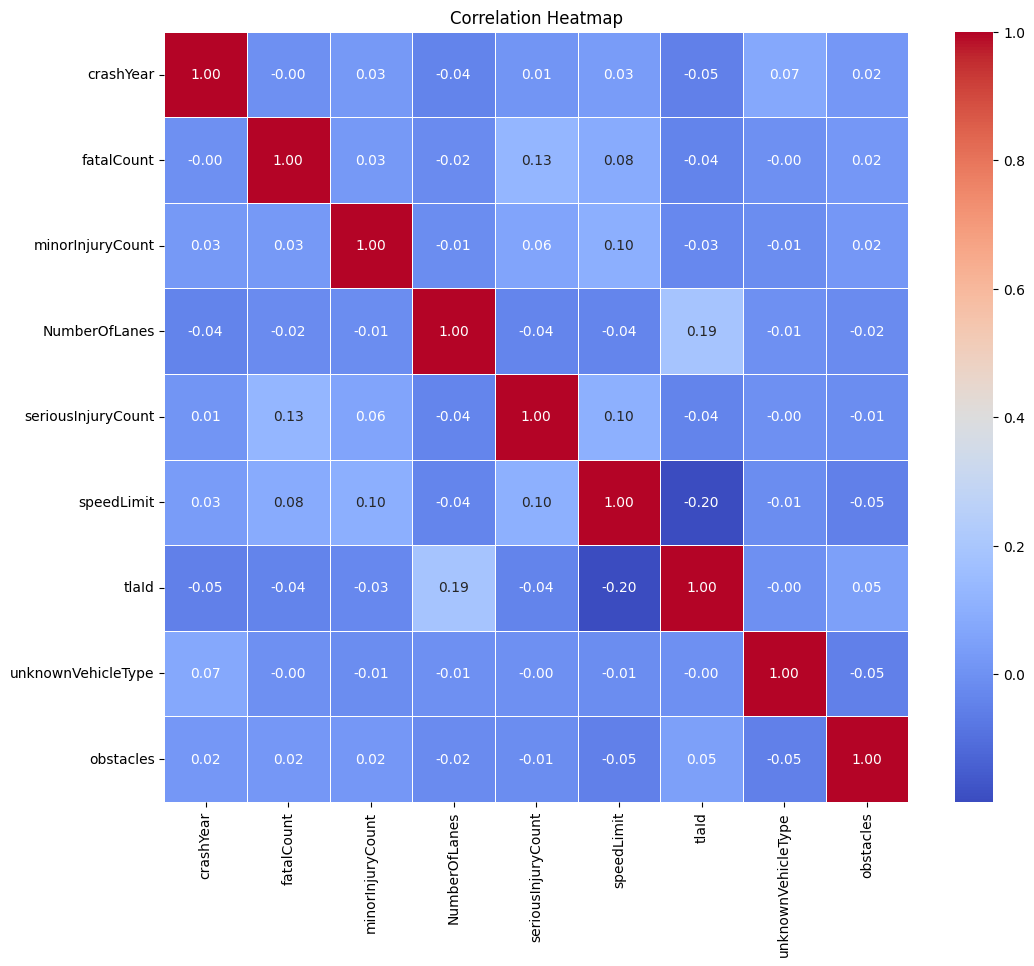

In [36]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17028\1577517456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crashSeverity', data=df, palette='viridis')


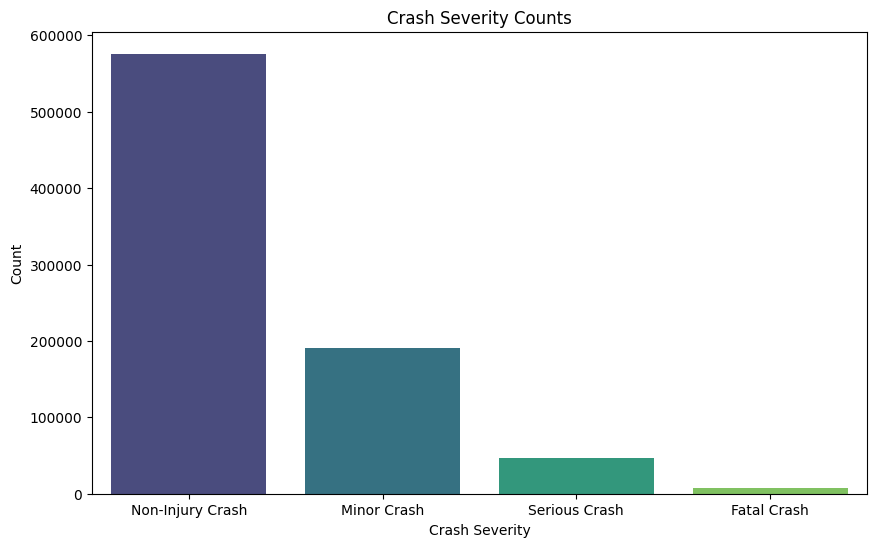

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='crashSeverity', data=df, palette='viridis')
plt.title('Crash Severity Counts')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.show()


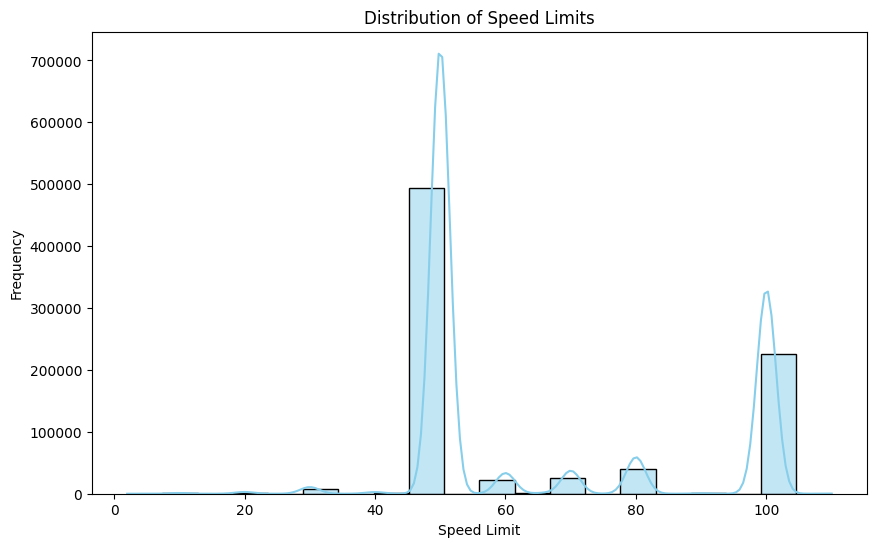

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['speedLimit'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17028\2355913892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='urban', data=df, palette='pastel')


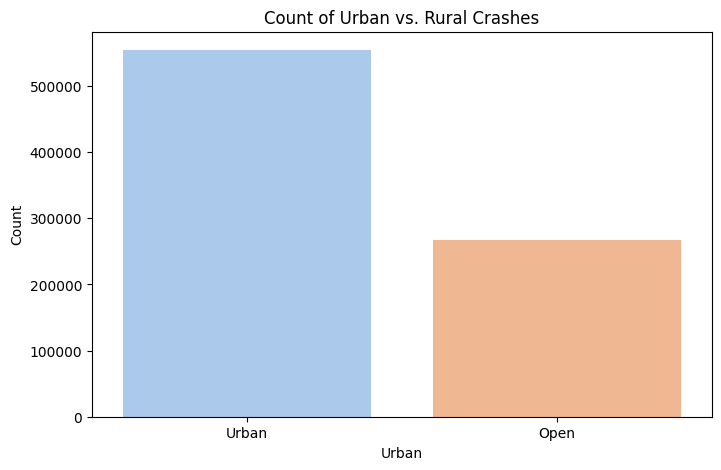

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='urban', data=df, palette='pastel')
plt.title('Count of Urban vs. Rural Crashes')
plt.xlabel('Urban')
plt.ylabel('Count')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17028\3677910731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis')


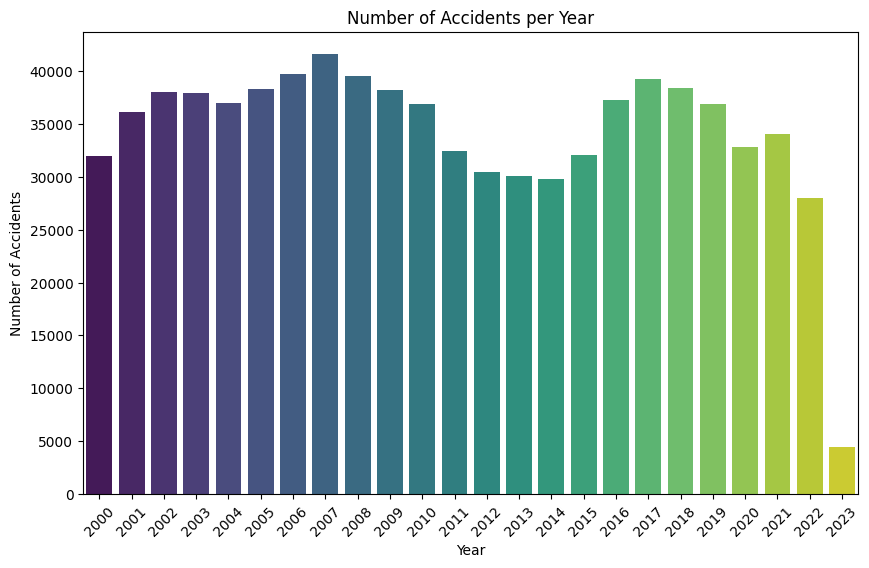

In [40]:
# number of crash per year
df['crashYear'] = df['crashYear'].astype(str)

# Count the number of accidents per year
accidents_per_year = df['crashYear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Modelling

In [43]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/77/91f92b2fddbd14201bf36cd0c0e7279f1501a88e7a00ef11261c4b95bb7a/scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# importing necesaary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


In [45]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['crashDirectionDescription',
 'crashFinancialYear',
 'crashSeverity',
 'crashSHDescription',
 'crashYear',
 'directionRoleDescription',
 'flatHill',
 'light',
 'region',
 'roadCharacter',
 'roadLane',
 'roadSurface',
 'streetLight',
 'tlaName',
 'trafficControl',
 'urban',
 'weatherA',
 'weatherB']

In [46]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [47]:
# Split the data into features (X) and target (y)
X = df.drop('crashSeverity', axis=1)
y = df['crashSeverity']


In [48]:
# Spliting the dataset into training and testing sets using a 70- 30 ratio,
#ensuring reproducibility with a fixed random state of 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Checking for class imbalance for the training dataset
y_train.value_counts()

crashSeverity
2    403532
1    133621
3     32725
0      5342
Name: count, dtype: int64

**Baseline Model**

Logistic Regression

In [50]:
# Using Pipeline for machine learning.
# Using MinMaxScaler for feature Scalling
# Using Logistic Regression as our model
Logistic_pipeline= Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(fit_intercept=False, solver='liblinear', max_iter=12000, random_state=42))])




In [51]:
# Fitting the logistic regression model to the train dataset
Logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, max_iter=12000,
                                    random_state=42, solver='liblinear'))])

In [ ]:
# Model Evaluation
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    print('Training Precision: ', precision_score(y_train, y_hat_train, average='weighted'))
    print('Testing Precision: ', precision_score(y_test, y_hat_test, average='weighted'))
    print('\n\n')

    print('Training Recall: ', recall_score(y_train, y_hat_train, average='weighted'))
    print('Testing Recall: ', recall_score(y_test, y_hat_test, average='weighted'))
    print('\n\n')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n\n')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train, average='weighted'))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test, average='weighted'))

In [ ]:
evaluate_model_performance(Logistic_pipeline, X_train, y_train, X_test, y_test)

Training Precision:  0.9999495881170016
Testing Precision:  0.9999553795635571



Training Recall:  0.9999495845067974
Testing Recall:  0.9999553795979296



Training Accuracy:  0.9999495845067974
Testing Accuracy:  0.9999553795979296



Training F1-Score:  0.9999495794891622
Testing F1-Score:  0.9999553767874647


In [ ]:
# improve model using ridge and lasso

In [ ]:
# use classification report

The class imbalance issue is still present and could potentially lead to misleading results. High accuracy, precision, recall, and F1-score can be misleading when dealing with imbalanced datasets, especially if the model is predominantly predicting the majority class.

All modelling will be done here

# **Model 2**


Removing Class Imbalance

Use decisiontree model


In [ ]:
# Using SMOTE to deal with class imbalance
#SMOTE contributes to more accurate predictions and better model performance
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

crashSeverity
2    575954
1    191336
3     46865
0      7589
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

crashSeverity
2    403532
1    403532
0    403532
3    403532
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_Pipeline = Pipeline([('ss', StandardScaler()),
                        ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
#Fitting the model in the new balanced dataset
DT_Pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
evaluate_model_performance(DT_Pipeline, X_train_resampled, y_train_resampled, X_test, y_test)

Training Precision:  1.0
Testing Precision:  0.9999269892087648



Training Recall:  1.0
Testing Recall:  0.9999269847966121



Training Accuracy:  1.0
Testing Accuracy:  0.9999269847966121



Training F1-Score:  1.0
Testing F1-Score:  0.9999269863164698


In [ ]:
# use classification report

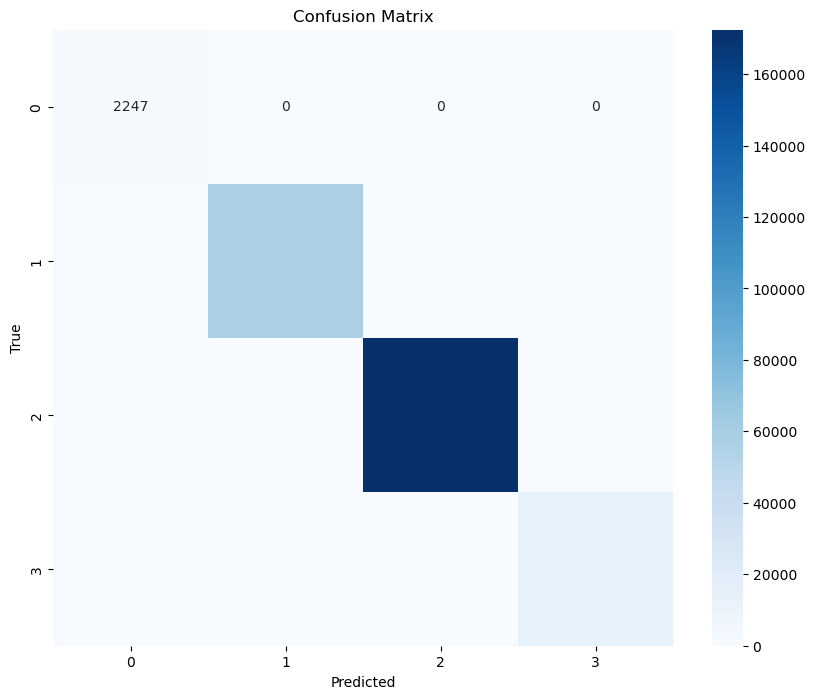

In [ ]:
# Predict on the testing set
y_pred = DT_Pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=DT_Pipeline.classes_, yticklabels=DT_Pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In the above we get to see the model is overfitting, we use gridsearch to deal with this issue

**use feature importance to reduce variables, and improve our model**

In [ ]:
# Extract feature importances from the trained decision tree classifier
feature_importances = DT_Pipeline.named_steps['dt'].feature_importances_

# Print or visualize feature importances
print("Feature Importances:", feature_importances)

Feature Importances: [1.89269271e-07 2.39245152e-06 6.42475093e-07 5.54191286e-07
 1.44556896e-06 3.33333333e-01 0.00000000e+00 6.07765990e-07
 3.33323802e-01 6.49624486e-10 1.57265419e-09 0.00000000e+00
 6.42696740e-08 1.56947681e-09 3.33325899e-01 3.92337615e-06
 2.17150189e-07 2.26139363e-06 1.82118307e-06 6.87578016e-07
 0.00000000e+00 9.97632132e-07 1.18814815e-07 0.00000000e+00
 1.03873186e-06]


In [ ]:
X_train_resampled.columns

Index(['crashDirectionDescription', 'crashFinancialYear', 'crashSHDescription',
       'crashYear', 'directionRoleDescription', 'fatalCount', 'flatHill',
       'light', 'minorInjuryCount', 'NumberOfLanes', 'region', 'roadCharacter',
       'roadLane', 'roadSurface', 'seriousInjuryCount', 'speedLimit',
       'streetLight', 'tlaId', 'tlaName', 'trafficControl',
       'unknownVehicleType', 'urban', 'weatherA', 'weatherB', 'obstacles'],
      dtype='object')

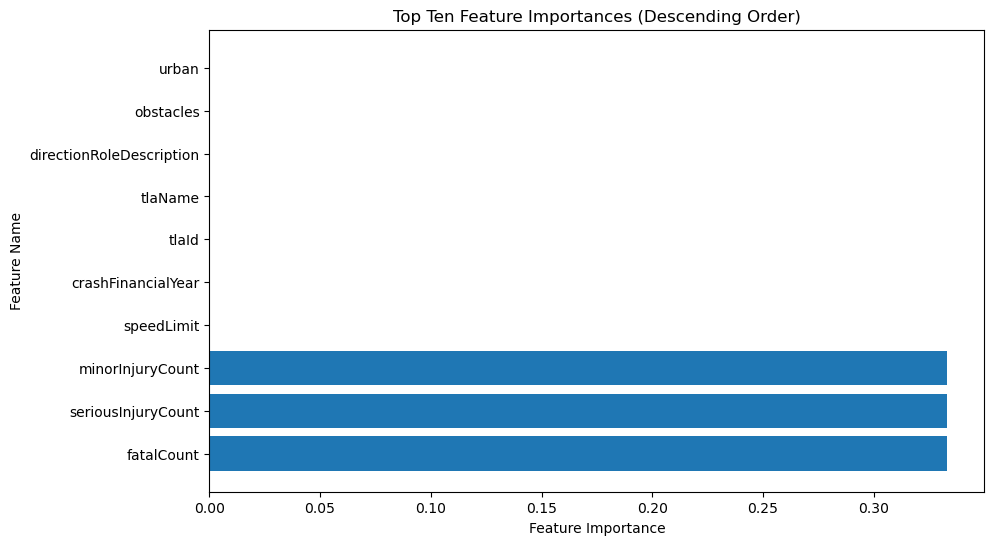

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Column names from X_train
column_names = ['crashDirectionDescription', 'crashFinancialYear', 'crashSHDescription',
                'crashYear', 'directionRoleDescription', 'fatalCount', 'flatHill',
                'light', 'minorInjuryCount', 'NumberOfLanes', 'region', 'roadCharacter',
                'roadLane', 'roadSurface', 'seriousInjuryCount', 'speedLimit',
                'streetLight', 'tlaId', 'tlaName', 'trafficControl',
                'unknownVehicleType', 'urban', 'weatherA', 'weatherB', 'obstacles']

# Feature importances
feature_importances = [1.89269271e-07, 2.39245152e-06, 6.42475093e-07, 5.54191286e-07,
                       1.44556896e-06, 3.33333333e-01, 0.00000000e+00, 6.07765990e-07,
                       3.33323802e-01, 6.49624486e-10, 1.57265419e-09, 0.00000000e+00,
                       6.42696740e-08, 1.56947681e-09, 3.33325899e-01, 3.92337615e-06,
                       2.17150189e-07, 2.26139363e-06, 1.82118307e-06, 6.87578016e-07,
                       0.00000000e+00, 9.97632132e-07, 1.18814815e-07, 0.00000000e+00,
                       1.03873186e-06]

# Sort feature importances and get corresponding indices
sorted_idx = np.argsort(feature_importances)
sorted_feature_importances = np.array(feature_importances)[sorted_idx]
sorted_column_names = np.array(column_names)[sorted_idx]

# Select top ten features
top_ten_feature_importances = sorted_feature_importances[-10:]
top_ten_column_names = sorted_column_names[-10:]

# Plot top ten feature importances with actual column names
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_ten_feature_importances)), top_ten_feature_importances, align='center')
plt.yticks(range(len(top_ten_feature_importances)), top_ten_column_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top Ten Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to display feature with highest importance at the top
plt.show()


In [ ]:
#objective one answered
print(top_ten_column_names)

['urban' 'obstacles' 'directionRoleDescription' 'tlaName' 'tlaId'
 'crashFinancialYear' 'speedLimit' 'minorInjuryCount' 'seriousInjuryCount'
 'fatalCount']


In [ ]:
# Define the columns you want to use
selected_columns = ['urban', 'obstacles', 'directionRoleDescription', 'tlaName', 'tlaId',
                    'crashFinancialYear', 'speedLimit', 'minorInjuryCount', 
                    'seriousInjuryCount', 'fatalCount']


In [ ]:
# use this selected columns
# Select only the selected columns from X_train and X_test
X_train_selected = X_train_resampled[selected_columns]
X_test_selected = X_test[selected_columns]


In [ ]:
NEW_DT_Pipeline = Pipeline([('ss', StandardScaler()),
                        ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
NEW_DT_Pipeline.fit(X_train_selected, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
evaluate_model_performance(NEW_DT_Pipeline, X_train_selected, y_train_resampled, X_test_selected, y_test)

Training Precision:  0.9999938047413058
Testing Precision:  0.999963492117746



Training Recall:  0.9999938047044596
Testing Recall:  0.9999634923983061



Training Accuracy:  0.9999938047044596
Testing Accuracy:  0.9999634923983061



Training F1-Score:  0.9999938047082977
Testing F1-Score:  0.9999634921642196


In [ ]:
# Create the pipeline
#DT_grid = {
    #'dt__criterion': ['gini', 'entropy'],
    #'dt__max_depth': [None, 2, 3, 4, 5, 6], 
    #'dt__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    #'dt__min_samples_split': [2, 5, 6, 10],
    #'dt__random_state': [42]
}

# Perform Grid Search with cross-validation
#Decision_Tree_gridsearch = GridSearchCV(estimator = DT_Pipeline, param_grid = DT_grid, cv=3)

# Fit using grid search
#Decision_Tree_gridsearch.fit(X_train_resampled, y_train_resampled)


In [ ]:
# Best hyperparameters
#best_params = Decision_Tree_gridsearch.best_params_
#print("Best hyperparameters:", best_params)

# Best estimator
#best_DT_model = Decision_Tree_gridsearch.best_estimator_


In [ ]:
# Evaluate the model
#evaluate_model_performance(Decision_Tree_gridsearch, X_train_resampled, y_train_resampled, X_test, y_test)

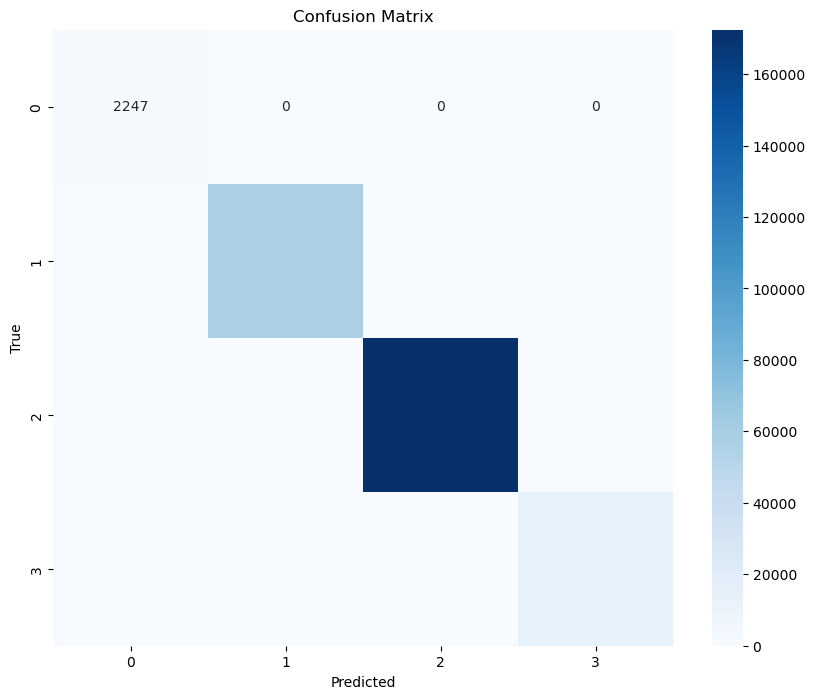

In [ ]:
# Predict on the testing set
y_pred = NEW_DT_Pipeline.predict(X_test_selected)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=NEW_DT_Pipeline.classes_, yticklabels=NEW_DT_Pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# classification report

**Push upto this point**

**Part to be worked upon, dont include this part**

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Pipeline = Pipeline([('ss', StandardScaler()),
                        ('KNN', KNeighborsClassifier())])

In [ ]:
KNN_Pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [ ]:
print(KNN_Pipeline.score(X_test, y_test))
print(KNN_Pipeline.score(X_train_resampled, y_train_resampled))


0.9736699063782837


In [ ]:
evaluate_model_performance(Decision_Tree_gridsearch, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
y_pred = KNN_Pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=KNN_Pipeline.classes_, yticklabels=KNN_Pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**RandomForestClassifier**

In [ ]:
from sklearn.neighbors import RandomForestClassifier
RF_Pipeline = Pipeline([('ss', StandardScaler()),
                        ('RF', Classifier(random_state=42))])

In [ ]:
RF_Pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=42))])

In [ ]:
train_score = RF_Pipeline.score(X_train_resampled, y_train_resampled)
test_score = RF_Pipeline.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.9999675487984943


In [ ]:
evaluate_model_performance(RF_Pipeline, X_train_resampled, y_train_resampled, X_test, y_test)

Training Precision:  1.0
Testing Precision:  0.9999675481550063



Training Recall:  1.0
Testing Recall:  0.9999675487984943



Training Accuracy:  1.0
Testing Accuracy:  0.9999675487984943



Training F1-Score:  1.0
Testing F1-Score:  0.9999675483639436


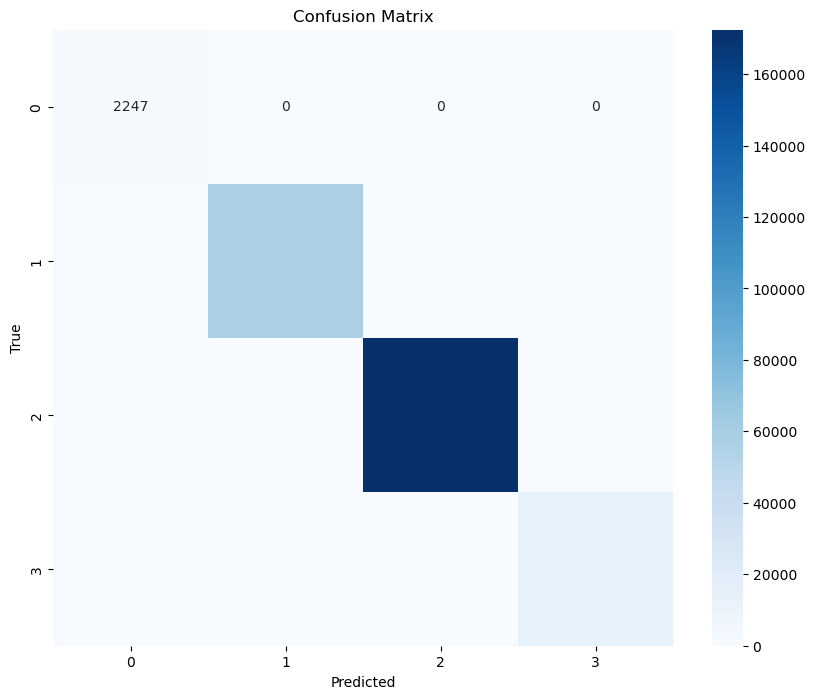

In [ ]:
# Predict on the testing set
y_pred = RF_Pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=RF_Pipeline.classes_, yticklabels=RF_Pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Use gridsearch to improve on the model

In [ ]:
RF_grid = [{
    'RF__n_estimators': [50, 100, 150],  # Number of trees
    'RF__max_depth': [4, 5, 6],           # Maximum depth of trees
    'RF__min_samples_leaf': [2, 5, 10],   # Minimum number of samples required to be at a leaf node
    'RF__min_samples_split': [1, 3, 5],   # Minimum number of samples required to split an internal node
    'RF__criterion': ['gini', 'entropy']  

# Perform Grid Search with cross-validation
RF_gridsearch = GridSearchCV(estimator = RF_Pipeline, param_grid = RF_grid, cv=3)

# Fit using grid search
RF_gridsearch.fit(X_train_resampled, y_train_resampled)
   

In [ ]:
# Evaluate the model
evaluate_model_performance(Decision_Tree_gridsearch, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
# Best hyperparameters
best_params = RF.gridsearch.best_params_
print("Best hyperparameters:", best_params)


In [ ]:
# FEATURE IMPORTANCE
optimal_rf =  RandomForestClassifier('n_estimators' =  ,  # Number of trees
    'max_depth' = ,           
    'min_samples_leaf' = ,
    'min_samples_split' = ,   
    'criterion' = )
#fitting the model
optimal_rf.fit(X_train_resampled, y_train_resampled)
#plotting
plot_feature_importances(optimal_rf)

In [ ]:
**

# Conclusion

Conclusion will be on this part